In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [2]:
file_path = "member.uid___A001_X2d20_X3993._G12v2.30__sci.spw21.cube.I.pbcor.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-18-14-14-31.tsv"

df = pd.read_csv(file_path, sep="\t", skiprows=5)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]

df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce')
df = df.dropna()

x = df[df.columns[0]]
y = df[df.columns[1]] * 1000  #Jy → mJy

my_lines =[(89.26916, "H2O v=0(4-3)")] #freq. , label
#template_lines = [(, "")]

In [3]:
#define binning & boxcar smoothing
def boxcar_smooth(y, kernel_size):
    kernel = np.ones(kernel_size)/kernel_size
    return np.convolve(y, kernel, mode="same")

def rebin_spectrum(x, y, bin_size):
    x = np.array(x)
    y = np.array(y)
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned

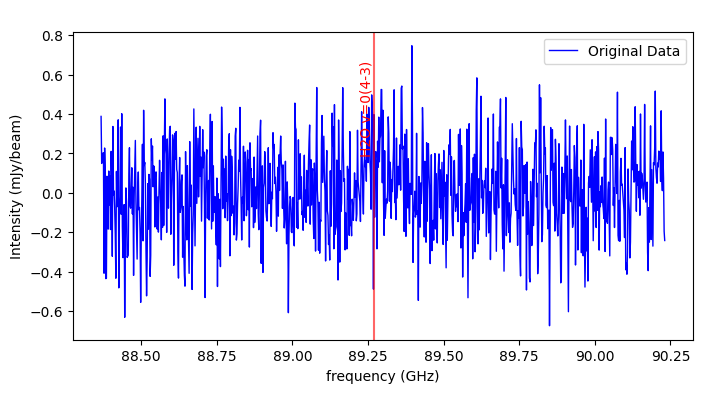

In [4]:
#original data
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Original Data", color="blue", linewidth=1)
plt.xlabel("frequency (GHz)")
plt.ylabel("Intensity (mJy/beam)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y)*0.9, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*0.9, label, rotation=90, color="blue", fontsize=12, ha='right', va='top')  
plt.title("    ")
plt.grid(False)
plt.legend()
plt.show()

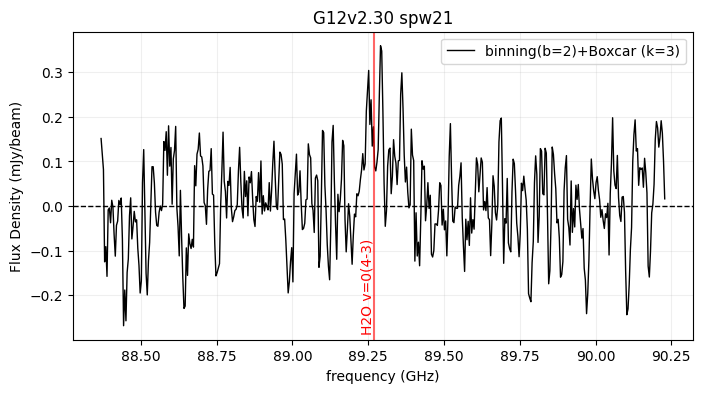

'#if you just need boxcar smoothing\n\ny_boxcar = boxcar_smooth(y, kernel_size=7)\n\nplt.figure(figsize=(8, 4))\nplt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=7)")\n#for freq, label in my_lines:\n#    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)\n#    plt.text(freq, max(y_boxcar)*-0.6, label, rotation=90, color="red", fontsize=10, ha=\'right\', va=\'bottom\')\n#for freq, label in template_lines:\n#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)\n#    plt.text(freq, max(df[df.columns[1]])*-0.6, label, rotation=90, color="blue", fontsize=10, ha=\'right\', va=\'bottom\')  \nplt.xlabel("frequency (GHz)")\nplt.ylabel("Flux Density (mJy/beam)")\nplt.title("G12v2.30 spw21")\n#plt.xlim(    ,     )\n#plt.ylim(    ,     )\nplt.axhline(0, color="black", linewidth=1, linestyle="--")\nplt.grid(True, alpha=0.2)\nplt.legend()\nplt.show()\n'

In [6]:

#if you need to binning + boxcar smoothing

x_binned, y_binned = rebin_spectrum(x, y, bin_size=2)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=3)

plt.figure(figsize=(8, 4))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=1, label="binning(b=2)+Boxcar (k=3)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_binned_boxcar)*-0.8, label, rotation=90, color="red", fontsize=10, ha='right', va='bottom')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*-0.6, label, rotation=90, color="blue", fontsize=10, ha='right', va='bottomp')  
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("G12v2.30 spw21")
#plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()
plt.show()


'''#if you just need boxcar smoothing

y_boxcar = boxcar_smooth(y, kernel_size=7)

plt.figure(figsize=(8, 4))
plt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=7)")
#for freq, label in my_lines:
#    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
#    plt.text(freq, max(y_boxcar)*-0.6, label, rotation=90, color="red", fontsize=10, ha='right', va='bottom')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*-0.6, label, rotation=90, color="blue", fontsize=10, ha='right', va='bottom')  
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("G12v2.30 spw21")
#plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()
plt.show()
'''
